# Proyecto 1 Entrega 1
Integrantes:
* Juan David Martinez -2019
* Johan Sebastian Caceres -202014171

## 0) Carga de datos y librerias

Temática escogida: Análisis de opinión dobre hoteles

In [1]:
import string

import numpy as np
import pandas as pd

import nltk
#from nltk.tokenize import TweetTokenizer

import matplotlib.pyplot as plt
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
!pip install langdetect
from langdetect import detect


from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
!pip uninstall spellchecker


In [3]:
##Usamos sep=';' ya que el archivo CSV está dividido por ; y no por ,
df_hotel = pd.read_csv('./data/HotelsReviews.csv')
df_hotel_test = pd.read_csv('./data/HotelsReviewsPruebas.csv')

df_hotel.head(10)

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,Villa Katherina carretera de Cádiz,1,Tanto yo como mi pareja hemos vivido una exper...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Villa_Katerina,0
1,1,Malo,1,Caro y malo. No lo recomiendo. No hay grupo g...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Xanaes,0
2,2,Finde carisimo,1,Mi marido y yo fuimos a pasar un fin de semana...,Granada_Province_of_Granada_Andalucia,Hotel_Palacio_de_Los_Navas,0
3,3,Una vez y no más.,2,Las comparaciones son odiosas pero he de decir...,Granada_Province_of_Granada_Andalucia,Casa_Palacio_Pilar_del_Toro_Hotel,0
4,4,Nada que ver con las fotos,1,La limpieza de la habitación es muy mala llega...,Almeria_Province_of_Almeria_Andalucia,Hotel_Embajador,0
5,5,Nada recomendable,1,Nos hospedamos un grupo de amigos desde el vie...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Gran_Plaza,0
6,6,NADA RECOMENDABLE. TENDRÉ SIEMPRE UN RECUERDO ...,1,Realicé reserva en este hotel para los días 19...,Huelva_Province_of_Huelva_Andalucia,Exe_Tartessos,0
7,7,"Nefasta experiencia, jamas elijáis esta opción",1,"Llegamos para pasar 24 horas en Córdoba, al pr...",Cordoba_Province_of_Cordoba_Andalucia,Hotel_Maximiano_Herculeo,0
8,8,Avoid this place,1,Arroyo Frio is located in the heart of the big...,Jaen_Province_of_Jaen_Andalucia,Apartamentos_Arroyo_Frio_La_Iruela,0
9,9,Entraron en el apartamento,2,"Hemos pasado 4 amigas el fin de semana, hemos ...",Granada_Province_of_Granada_Andalucia,Pension_Venecia_Gomerez,0


# 1. Enfoque analítico

## 1.1 Selección de features

En este caso, para la clasificación de reseñas de los hoteles es importante tener en cuenta todas las features para entrenar el modelo, excepto la ubicación, el título del hotel, y el id ya que no nos otorga información importante al clasificar las reseñas de los hoteles. 

Se usarán los features de title y review_text para la tokenización de las palabras y letras para la clasificación de las mismas. Además, se tendrá en cuenta el rating del hotel para la clasifiación de las opiniones para saber si fue una experiencia buena o mala. 

In [4]:
df_hotel.dtypes

Unnamed: 0      int64
title          object
rating          int64
review_text    object
location       object
hotel          object
label           int64
dtype: object

In [5]:
df_hotel = df_hotel.drop(['Unnamed: 0', 'location', 'hotel'], axis=1)
df_hotel_test=  df_hotel_test.drop(['Unnamed: 0', 'location', 'hotel'], axis=1)

## 1.2 Limpieza de datos (requerimientos ASUM_DB)



### 1.2.1 Completitud

Revisaremos si existen nulos en las columnas de los datos del dataframe original.

In [6]:
(df_hotel.isnull().sum() / df_hotel.shape[0]).sort_values(ascending = False)

title          0.0
rating         0.0
review_text    0.0
label          0.0
dtype: float64

No existen nulos por lo que no se hará ninguna limpieza ni tratamiento de nulos en el dataframe original.

Ahora, vamos hacer el mismo procedimiento en el dataframe de prueba.

In [7]:
(df_hotel_test.isnull().sum() / df_hotel_test.shape[0]).sort_values(ascending = False)

title          0.0
rating         0.0
review_text    0.0
dtype: float64

Tampoco existen nulos en el dataframe de prueba por lo que no se hará ninguna limpieza ni tratamiento de nulos. 

### 1.2.2 Unicidad

Ya que existen las reviews y los titulos, que son features que generalmente son únicas de por sí, vale la pena revisar si existen duplicados de estos registros para no sesgar el modelo.

In [8]:
df_hotel.loc[df_hotel.duplicated(subset = df_hotel.columns[0:], keep = False)].sort_values(by="title").head(10)

,title,rating,review_text,label
2490,10!,5,"Sitio perfecto! Bien situado, muy limpio, el p...",1
923,10!,5,"Sitio perfecto! Bien situado, muy limpio, el p...",1
2663,2 cumpleaños con encanto en un oasis de tranqu...,5,Hemos vuelto al Cortijo del Marques esta vez p...,1
2630,2 cumpleaños con encanto en un oasis de tranqu...,5,Hemos vuelto al Cortijo del Marques esta vez p...,1
2355,60 de Sharon,5,Qué lugar tan increíble para alojarse Lisa an ...,1
3102,60 de Sharon,5,Qué lugar tan increíble para alojarse Lisa an ...,1
1168,A beatiful building,5,· Cannot be praised enough. Extremely attracti...,1
2788,A beatiful building,5,· Cannot be praised enough. Extremely attracti...,1
216,A evitar,1,"Solo se salva la cena, en particular el salmor...",0
293,A evitar,1,"Solo se salva la cena, en particular el salmor...",0


Existen duplicados en el dataframe original. Por lo tanto, se procederá a elminarlos y dejar solo una muestra de ellos dentro del dataframe para el entrenamiento del modelo.

In [9]:
df_hotel.drop_duplicates(subset = df_hotel.columns[0:], keep='first', inplace = True)

In [10]:
df_hotel.loc[df_hotel.duplicated(subset = df_hotel.columns[0:], keep = False)].shape[0]

0

Ahora, revisaremos el dataframe de prueba para verificar que tampoco tenga nulos.

In [11]:
df_hotel_test.loc[df_hotel_test.duplicated(subset = df_hotel_test.columns[0:], keep = False)].shape[0]

0

No existen duplicados en el dataframe de prueba. Por esto, no se hará ninguna eliminación de duplicados en este dataframe.

## 1.4 Preparación de la variable objetivo

Vamos a revisar las clases de la variable objetivo ('label').

In [12]:
df_hotel['label'].value_counts()

1    3258
0     677
3     563
Name: label, dtype: int64

Que una opinión sea neutra no nos da mucho valor para lograr el objetivo del negocio en este caso. Por esto mismo, vamos a transformar los neutros teniendo en cuenta los valores de la columna 'rating'. 

In [13]:
df_hotel['rating'].value_counts()

5    2205
4    1053
3     563
1     428
2     249
Name: rating, dtype: int64

Si se tiene un registro con un valor neutro en el 'label' vamos a trasnformarlo teniendo en cuenta las siguientes condiciones:
1. Si el rating es de <= 3, el label pasará a ser malo (0).
2. Si el rating es de > 4, el label pasará a ser bueno (1).

In [14]:
mask = df_hotel['label'] == 3
df_hotel.loc[mask, 'label'] = df_hotel.loc[mask].apply(lambda x: 0 if x['rating'] <= 3 else 1, axis=1)

In [15]:
df_hotel['label'].value_counts()

1    3258
0    1240
Name: label, dtype: int64

# 2)Tokenización y vectorización de los textos

In [16]:
df_hotel.columns

Index(['title', 'rating', 'review_text', 'label'], dtype='object')

Como se explico anteriormente las features a usar son la review y el tittle por lo que para procesarlas se tomó la decisión de agrupar las dos columnas en una sola, debido a que el procesamiento de cada review se basará en la tokenización de cada palabra no hay conflicto al unificar las dos columnas y usarlas dentro del modelo.

In [17]:
X = df_hotel['review_text'] + " " + df_hotel['title'] # concatenar las columnas review_text y tittle
y = df_hotel['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Verificar el tamaño de los conjuntos de datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (3598,)
Tamaño de X_test: (900,)
Tamaño de y_train: (3598,)
Tamaño de y_test: (900,)


Procedemos a realizar una division de reviews etiquetados en los conjunto de entrenamiento y test, con el fin de evaluar la capacidad de generalizacion del modelo.  El conjunto de prueba se usará para evaluar el modelo generado. Stratify permite asegurar que la división de los datos sea muy similar para ambos conjuntos y las pruebas puedan tener mayor posibilidad de generar buenos resultados.

In [18]:
pd.Series(y_train).value_counts(normalize = True)

1    0.724291
0    0.275709
Name: label, dtype: float64

## 2.1) Tokenizacion de las reviews

Al iterar procesamientos, se encontro una cadena ´jjjjjj´ dentro de las reviews que estaba afectando a la ejecución por lo que se añadio a las stopwords. También se encontraron que habían reviews en epañol e inglés por lo anterior y debido a que los idiomas tienen diferente tratamiento, se les procesará diferenciadamente.

In [19]:
stop_words_en = stopwords.words('english')
stop_words_es = stopwords.words('spanish')

# combine the two sets of stop words
stop_words = stop_words_en + stop_words_es

# add "jjjjjj" to the stop words list
stop_words.append('jjjjjj')

# use the updated stop words list in your text processing



Se crea la función tokenizer que recibe el texto asociado a cada review, detecta su idioma y de acuerdo al mismo realiza una tokenizacion removiendo los caracteres no-alfanúmericos.

In [20]:
import nltk

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from langdetect import detect
from nltk import pos_tag

!pip install num2words
from num2words import num2words

# create tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# create lemmatizer
lemmatizer = WordNetLemmatizer()

# function to map part-of-speech tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a' # Adjetivo
    elif treebank_tag.startswith('V'):
        return 'v' # Verbo
    elif treebank_tag.startswith('N'):
        return 'n' # Sustantivo
    elif treebank_tag.startswith('R'):
        return 'r' # Adverbio
    else:
        return 'n' # Sustantivo por defecto

# function to tokenize and lemmatize text
def tokenizer(text):
    # detect language of text
    language = detect(text)

    # initialize spellchecker based on language
    if language == 'es':
        # tokenize Spanish text
        tokens = nltk.word_tokenize(text, language='spanish')
    else:
        # tokenize English text
        tokens = nltk.word_tokenize(text)

    # remove non-alphanumeric characters
    tokens = [token for token in tokens if token.isalnum()]
    
    # transform numbers from digit format to word format
    tokens = [num2words(token) if token.isnumeric() else token for token in tokens]

    # lemmatize tokens
    tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos_tag([token])[0][1])) for token in tokens]
    
    

    return tokens

## 2.2) Vectorizacion con TF-IDF

TF-IDF es una técnica de ponderación que se utiliza a menudo en el modelo de bolsa de palabras para determinar la importancia de una palabra en una review en relación con una colección de reviews. TF-IDF es el producto de dos medidas: la frecuencia del término (TF) y la frecuencia inversa del documento (IDF). La frecuencia del término mide la frecuencia de una palabra en una review específica, mientras que la frecuencia inversa del documento mide la rareza de una palabra en toda la colección de reviews. Al multiplicar estas dos medidas, se obtiene un peso que refleja la importancia de una palabra en una review en relación con toda la colección. Las palabras que son comunes en todas las reviews tendrán un peso bajo, mientras que las palabras que son raras y aparecen solo en unas pocas reviews tendrán un peso alto. Esto permite resaltar las palabras más relevantes para cada review.



In [21]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'far', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [23]:
len(tfidf.vocabulary_)

16793

## Entrenamiento y Evaluacion de los modelos y algoritmos 

Se realizaran los procesos de entrenamiento y evaluación de los modelos, después en base a los resultados se concluirá y se escogeran los modleos que mejor representen y cumplan las metas propuestas por el cliente.

## Random Forest

In [24]:
tfidf_model = RandomForestClassifier(random_state = 3)

In [25]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<AxesSubplot:>

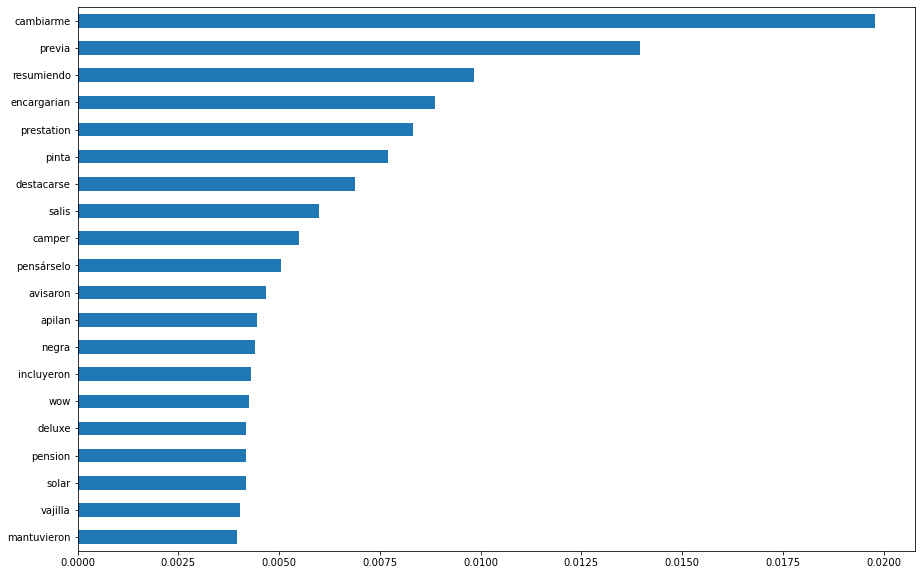

In [26]:
pd.Series(tfidf_model.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [27]:
tfidf_estimators = tfidf_model.estimators_
print('Number of trees:', len(tfidf_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 143.33


In [28]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

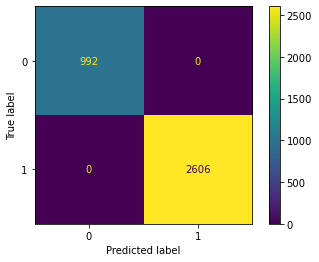

In [29]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

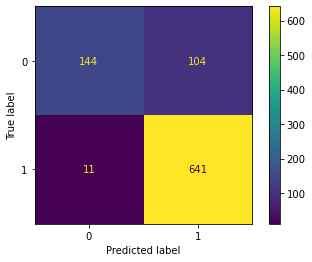

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [31]:
if len(tfidf_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 1))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 1))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 1))

Precision: 0.8604026845637583
Recall: 0.9831288343558282
F1: 0.917680744452398


### Análisis del error


In [32]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test], axis=1).reset_index(),
    pd.Series(y_test_tfidf_predict, name='predicted') ],
    axis=1
).rename(columns={'label': 'actual'})
error_df.drop('index', inplace = True, axis = 1)
error_df.dtypes

0            object
actual        int64
predicted     int64
dtype: object

In [33]:
error_df.loc[error_df['actual'] != error_df['predicted']].shape

(115, 3)

In [34]:
error_df.loc[error_df['actual'] != error_df['predicted']]

,0,actual,predicted
6,Llegamos de rebote a este hotel porque aquel d...,0,1
9,Nos alojamos en verano porque la casa de los f...,0,1
25,Fue agradable alojarse en Córdoba apartamentos...,0,1
27,"La ubicación es fantástica, la casa tiene enca...",0,1
42,Pues habiendo estado varias veces en este hote...,0,1
...,...,...,...
841,"Buena calidad-precio. Habitación muy amplia, c...",0,1
847,No aconsejo para nada la estancia en estos apa...,0,1
887,Habitaciones con temática que no se sabe por q...,0,1
891,He estado una noche y el hotel es un poco anti...,0,1


### Arboles de decison

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with default hyperparameters
tree_model = DecisionTreeClassifier()
tree_model.fit(X_tfidf, y_train)


DecisionTreeClassifier()

<AxesSubplot:>

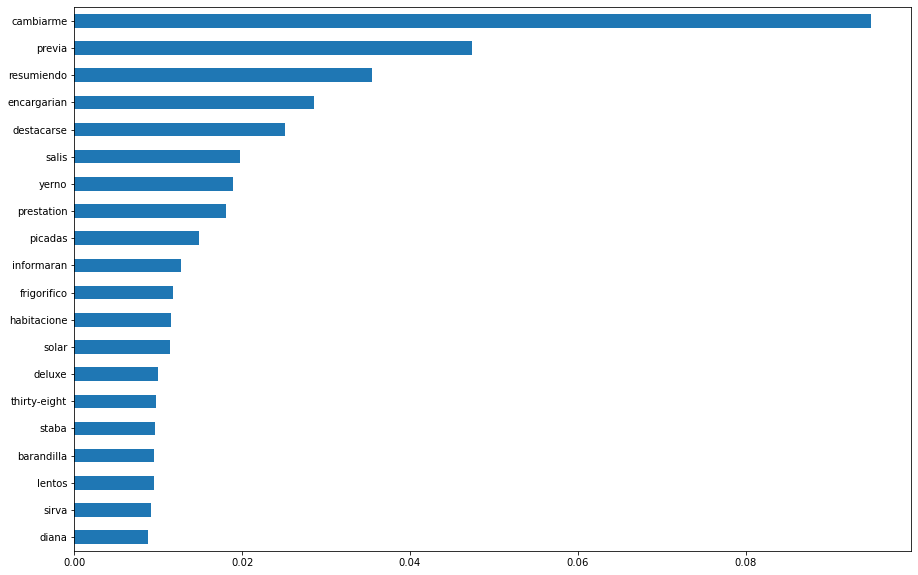

In [36]:
pd.Series(tree_model.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [37]:

depth = tree_model.get_depth()
print('Tree depth:', depth)

Tree depth: 98


In [38]:
y_train_tfidf_predictTree = tree_model.predict(X_tfidf)
y_test_tfidf_predictTree = tree_model.predict(tfidf.transform(X_test))

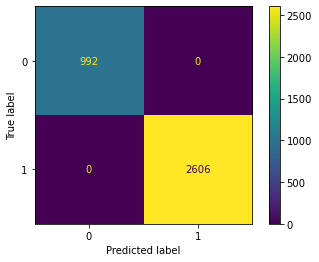

In [39]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predictTree)

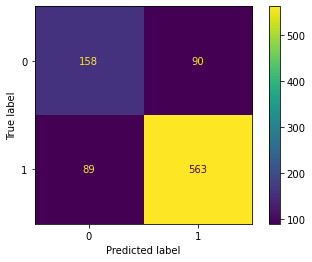

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predictTree)

In [41]:
if len(tree_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_tfidf_predictTree, pos_label =1))
    print('Recall:', recall_score(y_train, y_train_tfidf_predictTree, pos_label = 1))
    print('F1:', f1_score(y_train, y_train_tfidf_predictTree, pos_label = 1))


Precision: 1.0
Recall: 1.0
F1: 1.0


In [42]:
if len(tfidf_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_tfidf_predictTree, pos_label = 1))
    print('Recall:', recall_score(y_test, y_test_tfidf_predictTree, pos_label = 1))
    print('F1:', f1_score(y_test, y_test_tfidf_predictTree, pos_label = 1))

Precision: 0.8621745788667687
Recall: 0.8634969325153374
F1: 0.8628352490421456


In [43]:
error_df2 = pd.concat(
    [ pd.concat([X_test, y_test], axis=1).reset_index(),
    pd.Series(y_test_tfidf_predictTree, name='predicted') ],
    axis=1
).rename(columns={'label': 'actual'})
error_df2.drop('index', inplace = True, axis = 1)
error_df2.dtypes

0            object
actual        int64
predicted     int64
dtype: object

In [44]:
error_df2.loc[error_df2['actual'] != error_df2['predicted']].shape

(179, 3)

In [45]:
error_df2.loc[error_df2['actual'] != error_df2['predicted']].sample(10)

,0,actual,predicted
425,Yo soy de Granada y solo conozco la parte de l...,1,0
753,No hay absolutamente nada de malo en este luga...,1,0
8,"El hostel en si es muy bonito, con ascensor y ...",1,0
730,Empezar diciendo que creo que no aceptan niños...,1,0
514,Mi opinión personal acerca del Hotel Casa Pila...,1,0
183,"Buena ubicación en el centro de Sevilla, cerca...",0,1
125,"Hotel situado junto al rio, cerca de un centro...",1,0
536,Perfectamente situado para acceder a granada. ...,1,0
402,"veraneamos hace varios años en bahia sur , y l...",0,1
888,El hotel está muy céntrico para conocer Jerez....,1,0


### Regresión logística

In [46]:
from sklearn import linear_model

logistic_model = linear_model.LogisticRegression()
logistic_model.fit(X_tfidf, y_train)

LogisticRegression()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

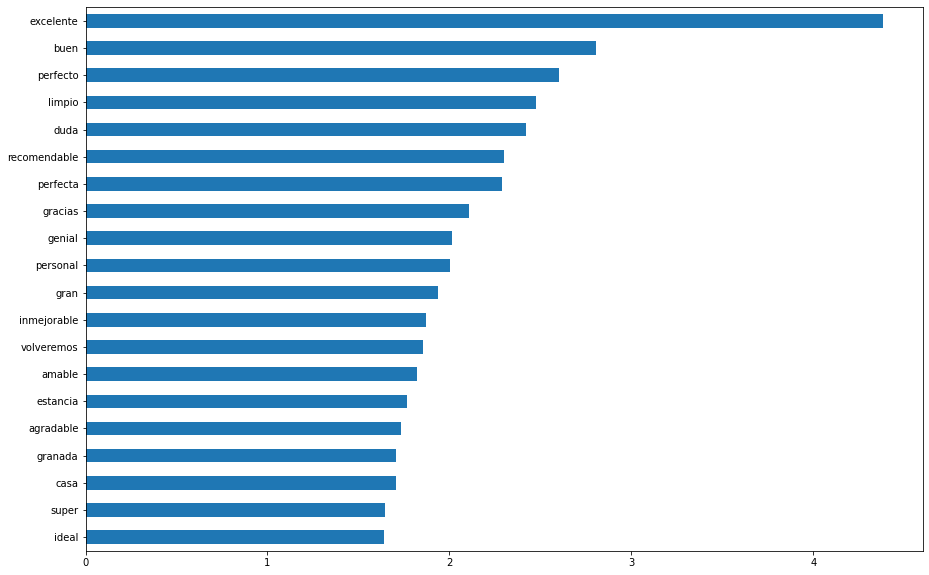

In [47]:
coef = logistic_model.coef_[0]
indices = coef.argsort()[-20:]
imp_features = pd.Series(coef[indices], index=np.array(tfidf.get_feature_names())[indices])

imp_features.plot(kind='barh', figsize=(15,10))


In [48]:
y_train_tfidf_predictLogistic = logistic_model.predict(X_tfidf)
y_test_tfidf_predictLogistic = logistic_model.predict(tfidf.transform(X_test))

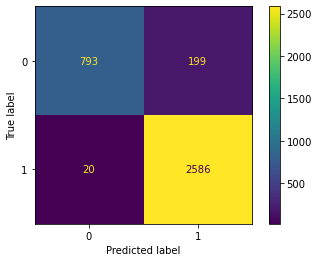

In [49]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predictLogistic)

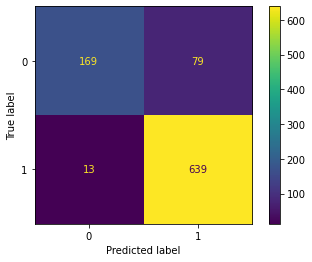

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predictLogistic)

Métricas del entrenamiento

In [51]:
print('Precision:', precision_score(y_train, y_train_tfidf_predictLogistic, pos_label =1))
print('Recall:', recall_score(y_train, y_train_tfidf_predictLogistic, pos_label = 1))
print('F1:', f1_score(y_train, y_train_tfidf_predictLogistic, pos_label = 1))

Precision: 0.9285457809694794
Recall: 0.9923254029163469
F1: 0.9593767390094602


Métricas del testeo

In [52]:
print('Precision:', precision_score(y_test, y_test_tfidf_predictLogistic, pos_label = 1))
print('Recall:', recall_score(y_test, y_test_tfidf_predictLogistic, pos_label = 1))
print('F1:', f1_score(y_test, y_test_tfidf_predictLogistic, pos_label = 1))

Precision: 0.8899721448467967
Recall: 0.9800613496932515
F1: 0.9328467153284671


Errores de predicción

In [53]:
error_df3 = pd.concat(
    [ pd.concat([X_test, y_test], axis=1).reset_index(),
    pd.Series(y_test_tfidf_predictLogistic, name='predicted') ],
    axis=1
).rename(columns={'label': 'actual'})
error_df3.drop('index', inplace = True, axis = 1)
error_df3.dtypes

0            object
actual        int64
predicted     int64
dtype: object

In [54]:
error_df3.loc[error_df3['actual'] != error_df3['predicted']].shape

(92, 3)

In [55]:
error_df3.loc[error_df3['actual'] != error_df3['predicted']].sample(10)

,0,actual,predicted
817,Tiene buena ubicación si quieres tomar un tren...,0,1
357,Relación calidad precio buena. El desayuno exc...,0,1
705,"Lugar con buenas instalaciones, acordes al pre...",0,1
287,"Hotel pasable en general, zonas comunes pequeñ...",0,1
622,"Localización.- Para llegar, regular -zona peat...",0,1
836,la verdad que las habitaciones estan regulares...,0,1
530,Pasamos una noche en Sevilla y nos quedamos en...,1,0
627,Hemos pasado 4 días en este hotel y he de dest...,1,0
448,"Soy Carlos, y me hospedé con unos amigos duran...",0,1
674,"Nos prometieron un apartamento de 1 cama, pero...",0,1
